In [28]:
import os
import cv2

import analysis
import constants as k
import helpers
import processing_helpers

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

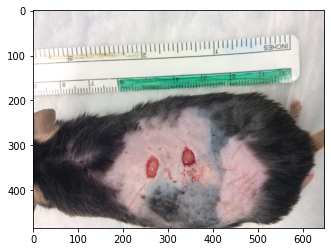

In [43]:
image = cv2.imread("../../resources/Example/IFNspotted.jpg")
small_to_large_image_size_ratio = 0.25
image = cv2.GaussianBlur(image, (3, 3), cv2.BORDER_DEFAULT)
image = cv2.resize(image,  # original image
                          (0, 0),  # set fx and fy, not the final size
                          fx=small_to_large_image_size_ratio,
                          fy=small_to_large_image_size_ratio,
                          interpolation=cv2.INTER_NEAREST)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

plt.show()

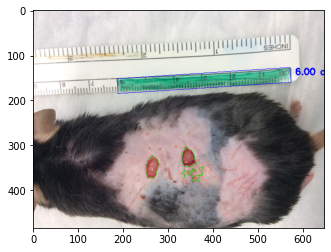

In [55]:
masks = {"lower_range": {}, "upper_range": {}}     
masks["lower_range"]["first"] = k.C_LR[0]
masks["lower_range"]["second"] = k.C_LR[1]
masks["upper_range"]["first"] = k.C_UR[0]
masks["upper_range"]["second"] = k.C_UR[1]
width = 6
ratio, rec_image = processing_helpers.find_real_size(image, width)

sq_ratio = helpers.find_sq_ratio(image, width)
data = analysis.measurement(image, rec_image, sq_ratio, k.B_LR, k.B_UR)
rgb = cv2.cvtColor(data["drawn_image"], cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()